In [6]:
'''Entry point for the particle filtering code '''

import sys
sys.path.append('../')
import numpy as np

from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''Algorithm object encapsulating all the requirements

The integrator is an object which runs the t->t+1 propagation of the particles, primarily using the LSODA 
integrator built in to scipy.integrate(solve_ivp)

The perturb object performs multivariate perturbations on the state variables and the estimated variables

The resampler computes the weights and resamples based on a known algorithm(multinomial,systematic,residual)



'''
algo = TimeDependentAlgo(integrator = LSODASolver(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.05,"sigma2":0.1}),
                        resampler = NBinomResample(),
                        ctx=Context(population=7_700_000,
                                    state_size = 4,
                                    prior_weights=np.zeros(1000),
                                    pos_weights = np.zeros(1000),
                                    weight_ratio=np.ones(1000),
                                    seed_loc=[1],
                                    seed_size=0.005,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(),
                        particle_count=20000))

algo.initialize(params={
"beta":ESTIMATION.VARIABLE,
"gamma":0.06,
"mu":0.004,
"q":0.1,
"eta":1/7,
"std":10,
"R":50,
"hosp":ESTIMATION.STATIC,
"L":90,
"D":10,
}
,priors={"beta":partial(algo.ctx.rng.uniform,0.1,0.6), 
          "gamma":partial(algo.ctx.rng.uniform,0,1/7),
          "eta":partial(algo.ctx.rng.uniform,1/15,1/3),
          "hosp":partial(algo.ctx.rng.uniform,5,20),
          "D":partial(algo.ctx.rng.uniform,0,20)
          })

'''Runs the PF over the specified data set for the specified length of time'''

#algo.print_particles()
algo.run(f'../datasets/WA_FLU_HOSPITALIZATIONS.csv',150)



/Users/averydrennan/SMC_EPI/SMC_EPI/.venv/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


{'beta': 0.13658523175453072, 'gamma': 0.06, 'mu': 0.004, 'q': 0.1, 'eta': 0.14285714285714285, 'std': 10, 'R': 50, 'hosp': 6.1202648690013906, 'L': 90, 'D': 10}
Iteration: 0
{'beta': 0.11732547759526576, 'gamma': 0.06, 'mu': 0.004, 'q': 0.1, 'eta': 0.14285714285714285, 'std': 10, 'R': 50, 'hosp': 5.115973272704062, 'L': 90, 'D': 10}
Iteration: 1
{'beta': 0.3878609182039448, 'gamma': 0.06, 'mu': 0.004, 'q': 0.1, 'eta': 0.14285714285714285, 'std': 10, 'R': 50, 'hosp': 10.617082805848103, 'L': 90, 'D': 10}
Iteration: 2
{'beta': 0.41239773959526627, 'gamma': 0.06, 'mu': 0.004, 'q': 0.1, 'eta': 0.14285714285714285, 'std': 10, 'R': 50, 'hosp': 6.888526917672202, 'L': 90, 'D': 10}
Iteration: 3
{'beta': 0.55250924506934, 'gamma': 0.06, 'mu': 0.004, 'q': 0.1, 'eta': 0.14285714285714285, 'std': 10, 'R': 50, 'hosp': 11.057549302724254, 'L': 90, 'D': 10}
Iteration: 4
{'beta': 0.31220147048193236, 'gamma': 0.06, 'mu': 0.004, 'q': 0.1, 'eta': 0.14285714285714285, 'std': 10, 'R': 50, 'hosp': 19.2632

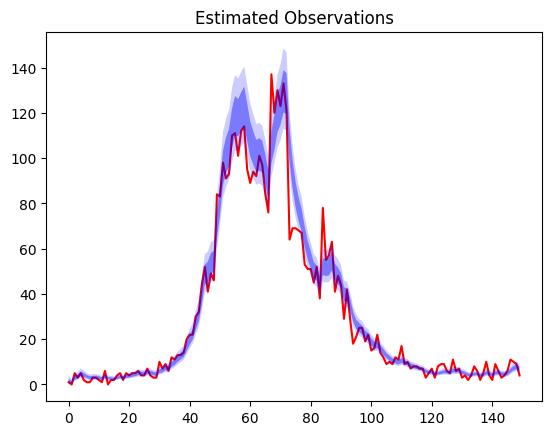

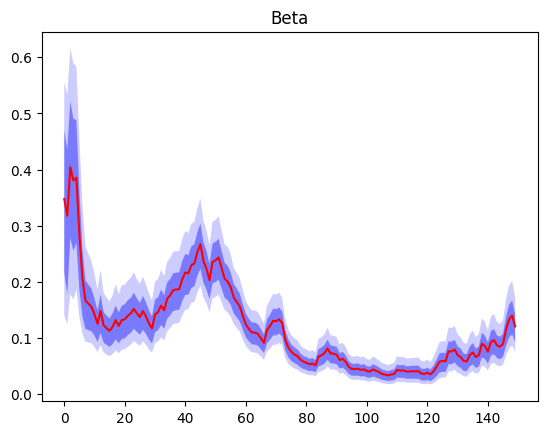

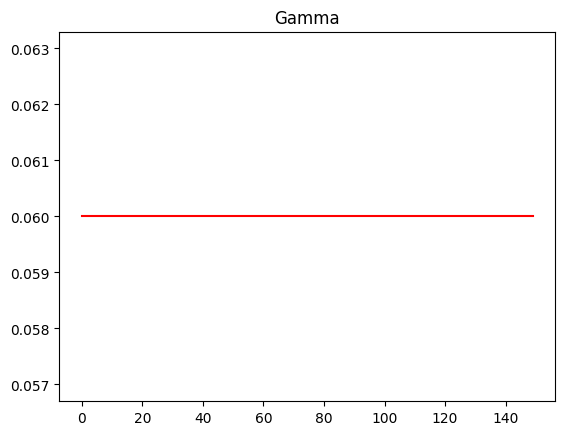

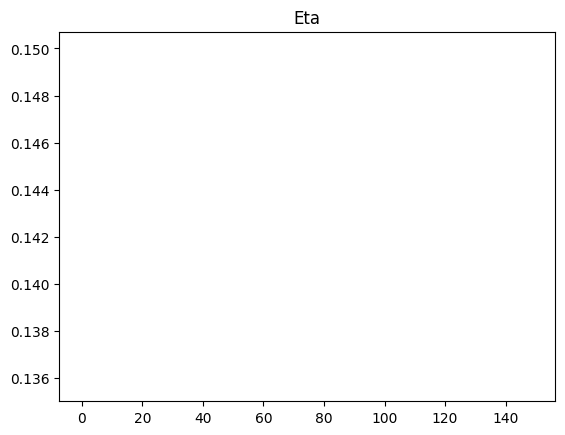

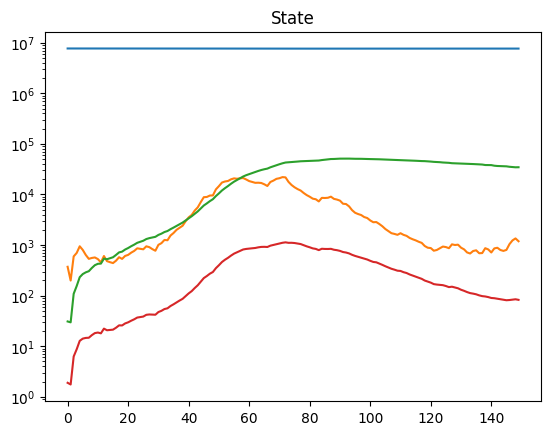

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = pd.read_csv('../datasets/WA_FLU_HOSPITALIZATIONS.csv').to_numpy()
real_data = np.delete(real_data,0,1)

estimated_data = pd.read_csv('../datasets/particle_observation.csv').to_numpy()
estimated_data = np.delete(estimated_data,0,1)


t = 150

plt.title("Estimated Observations")

plt.fill_between(np.arange(0,t), estimated_data[:,3], estimated_data[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), estimated_data[:,6], estimated_data[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(np.arange(0,t),real_data[0:t],color='red')
plt.show()

pf_beta = pd.read_csv('../datasets/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1)




beta_quantiles = pd.read_csv('../datasets/beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles,0,1)

pf_eta = pd.read_csv('../datasets/average_eta.csv').to_numpy()
pf_eta = np.delete(pf_eta,0,1)
eta_quantiles = pd.read_csv('../datasets/eta_quantiles.csv').to_numpy()
eta_quantiles = np.delete(eta_quantiles,0,1)

pf_gamma = pd.read_csv('../datasets/average_gamma.csv').to_numpy()
pf_gamma = np.delete(pf_gamma,0,1)
gamma_quantiles = pd.read_csv('../datasets/gamma_quantiles.csv').to_numpy()
gamma_quantiles = np.delete(gamma_quantiles,0,1)

pf_state = pd.read_csv('../datasets/ESTIMATED_STATE.csv').to_numpy()
pf_state = np.delete(pf_state,0,1)

plt.title("Beta")

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(pf_beta,color="red",zorder=12)
plt.savefig('Beta.png')
plt.show()

plt.title("Gamma")

plt.plot(pf_gamma,zorder=12,color = 'red')
plt.fill_between(np.arange(0,t), gamma_quantiles[:,3], gamma_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), gamma_quantiles[:,6], gamma_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.title("Eta")

plt.fill_between(np.arange(0,t), eta_quantiles[:,3], eta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), eta_quantiles[:,6], eta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.yscale('log')
plt.title("State")
plt.plot(pf_state)
plt.savefig('State.png')

